# Evaluate Trends in Fake News Circulation on Twitter in the run-up to the 2020 US Presidential Elections


# Team Members
Abhishek Bais, Samer Baslan, Jimmy Liang, Rohan Kumar

# **FAKE NEWS DATA ANALYSIS**

# **Data Inspection**

# Import packages

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Peak at the fake news dataset


In [ ]:
# Peek at the real news dataset, excluding the first, second column
df = pd.read_csv('/content/drive/My Drive/255/datasets/fake_news.csv', ).iloc[:, 2:]
df.head(5)

,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


# Report the number of news entries

In [ ]:
# Report the number of entries in fake news dataset
df.shape

(12999, 18)

# Inspect columns for missing entries

In [ ]:
# Inspect the dataset to find missing entries
df.isnull().sum()

author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

# Handle columns with missing entries

In [ ]:
# Fill columns with missing title with null string

df['title'].fillna("", inplace=True)
df.isnull().sum()
df.shape

(12999, 18)

# Report unique authors of fake news

In [ ]:
# Report unique authors of fake news
df['author'].value_counts().head(10)

admin                                    247
Editor                                   100
Alex Ansary                              100
Starkman                                 100
Pakalert                                 100
Eddy Lavine                              100
Gillian                                  100
Dave Hodges                               99
noreply@blogger.com (Alexander Light)     99
BareNakedIslam                            99
Name: author, dtype: int64

In [ ]:
# Report the columns
df.columns

Index(['author', 'published', 'title', 'text', 'language', 'crawled',
       'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score',
       'main_img_url', 'replies_count', 'participants_count', 'likes',
       'comments', 'shares', 'type'],
      dtype='object')

# Report fake news by category

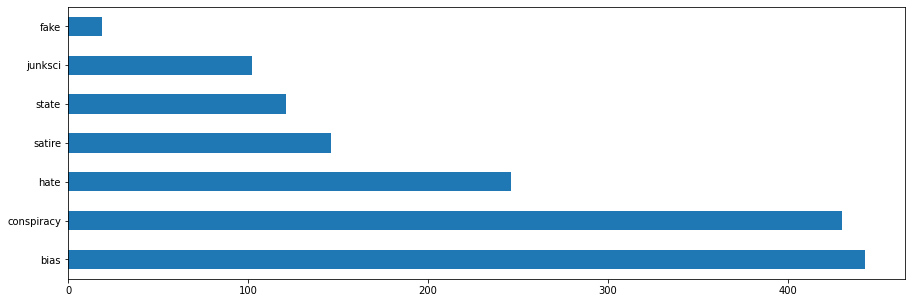

In [ ]:
# Report fake news by type, excluding bs news
plt.figure(figsize=(15,5))
df[df['type'] != 'bs']['type'].value_counts().plot(kind="barh")

# Report the fake news by country of origin

Text(0.5, 1.0, 'Fake News by country of origin')

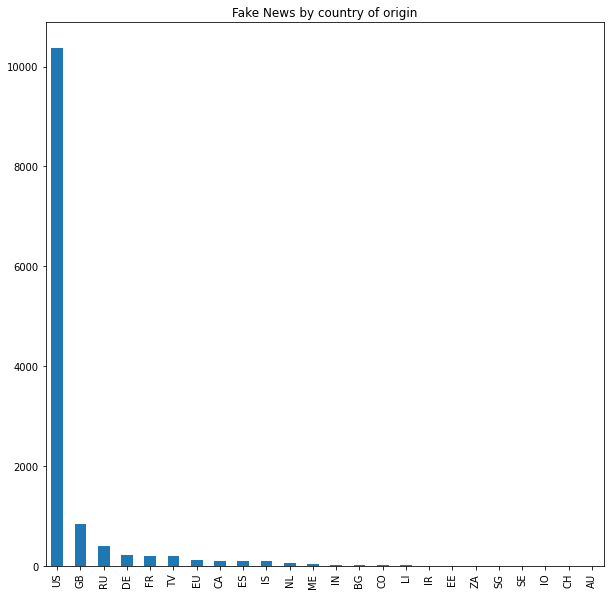

In [ ]:
# Check to see whether enough fake news originates in the USA
# Drop data with null entries
plt.figure(figsize=(10,10))
df['country'].dropna().value_counts().plot(kind="bar")
plt.title("Fake News by country of origin")

# **Data Cleaning**

# Drop columns not required for analysis

In [ ]:
# Drop entries with null text
# Drop unwanted columns
fake_news = fake_news[['title', 'text','site_url']]
df.dropna(subset=['text'], axis=0, inplace=True)
df.drop(['author','country','domain_rank','main_img_url','thread_title'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
spam_score            0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
dtype: int64

In [ ]:
# Report fake news entries post drop columns
df.shape

(12953, 13)

In [ ]:
# Peak fake news dataset post drop columns
df.head(5)

,published,title,text,language,crawled,site_url,spam_score,replies_count,participants_count,likes,comments,shares,type
0,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,0.000,0,1,0,0,0,bias
1,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,0.000,0,1,0,0,0,bias
2,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,0.000,0,1,0,0,0,bias
3,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,0.068,0,0,0,0,0,bias
4,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,0.865,0,0,0,0,0,bias


In [ ]:
# Function to clean and lemmatize text
def clean_and_lemmatize(text):
  # 1. remove special characters and numbers
  # 2. lowercase text
  # 3. lemmatize and remove stop words
  # 4. skip 4 letter words like that, they
  # 5. concatenate the cleaned text
  lemmatizer = WordNetLemmatizer()
  # 1. remove special characters and numbers
  clean_and_lemma_text = re.sub('[^a-zA-Z]', ' ', text)

  # 2. lowercase text
  clean_and_lemma_text = clean_and_lemma_text.lower()
    
  # 3. lemmatize good size words, remove stop words, recreate content
  stop_words = set(stopwords.words('english'))
  word_list = clean_and_lemma_text.split()
  clean_and_lemma_text = ' '.join([lemmatizer.lemmatize(w) for w in word_list if not w in stop_words and len(w)>4])   

  return clean_and_lemma_text

# Clean and lemmatize news title

In [ ]:
# Clean and lemmatize news title
title = []
for i in range(0, len(df)):
  sentence = df['title'][i]
  clean_and_lemma_sentence = clean_and_lemmatize(sentence)
  title.append(clean_and_lemma_sentence)

print(title)

['muslim busted stole million benefit', 'attorney general loretta lynch plead fifth', 'breaking weiner cooperating hillary email investigation', 'speech father daughter kidnapped killed voted donald trump percentfedup', 'fantastic trump point reform healthcare begin bombshell percentfedup', 'hillary absolutely berserk protester rally video', 'breaking ready arrest weiner hillary visited pedophile island least time money laundering underage proof inappropriate handling classified information percentfedup', 'whistleblower tell chilling story massive voter fraud trump campaign ready lawsuit election critical district video percentfedup', 'breaking clinton cleared coordinated minute trick energize hillary percentfedup', 'hillary supporter trump truck daddy fishing trump bumper sticker video percentfedup', 'yikes hillary rail pull howard video', 'goodbye hollywood celebs threatened leave percentfedup', 'kidding college student space trump threaten student trump chalkings', 'show trump would

# **Data Visualization**

In [ ]:
# Function to compute ngrams given n, text
def n_grams(text, n):
  ngrams = {}
  ngram = []
  for paragraph in text:
    word_list = nltk.word_tokenize(paragraph)
    for i in range(len(word_list)-n):
     seq = ' '.join(word_list[i:i+n])
     ngram.append(seq)
     if seq not in ngrams.keys():
       ngrams[seq] = []
       ngrams[seq].append(word_list[i+n])
  return ngram

# Plot most common words in news title

<BarContainer object of 10 artists>

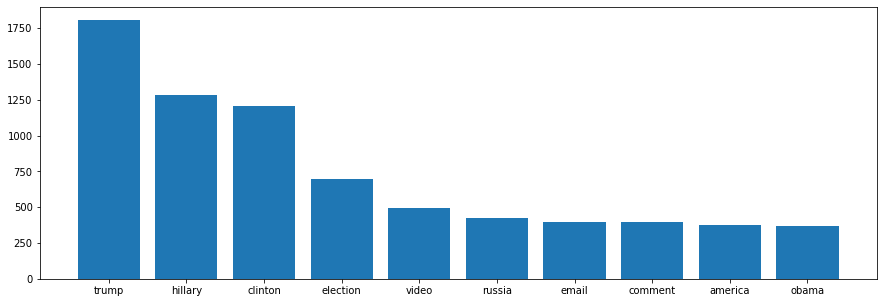

In [ ]:
# Plot most common words in fake news title
words = []
for sentence in title:
 words.append(sentence.split())

words = [j for i in words for j in i]
freq_distribution = FreqDist(words)
plt.figure(figsize=(15,5))
plt.bar(*zip(*freq_distribution.most_common(10)))

# Plot bigram of most common words in news title

[('hillary clinton', 376), ('donald trump', 267), ('onion america', 99), ('america finest', 99), ('clinton campaign', 73), ('clinton email', 66), ('trump supporter', 58), ('dakota access', 52), ('clinton foundation', 49), ('voting machine', 45)]


Text(0.5, 1.0, 'Bigram for top 10 most common words in fake news title')

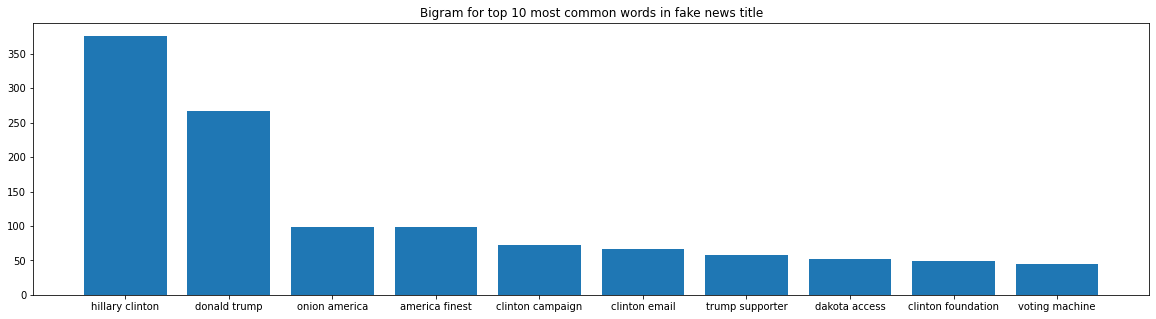

In [ ]:
# Report the top 10 most common words in news title
bigram = n_grams(title, 2)
freq_distribution = FreqDist(bigram)
print(freq_distribution.most_common(10))

# Plot bigram of top 10 most common words in news title
plt.figure(figsize=(20,5))
plt.bar(*zip(*freq_distribution.most_common(10)))
plt.title('Bigram for top 10 most common words in fake news title')

# Plot word cloud of news title

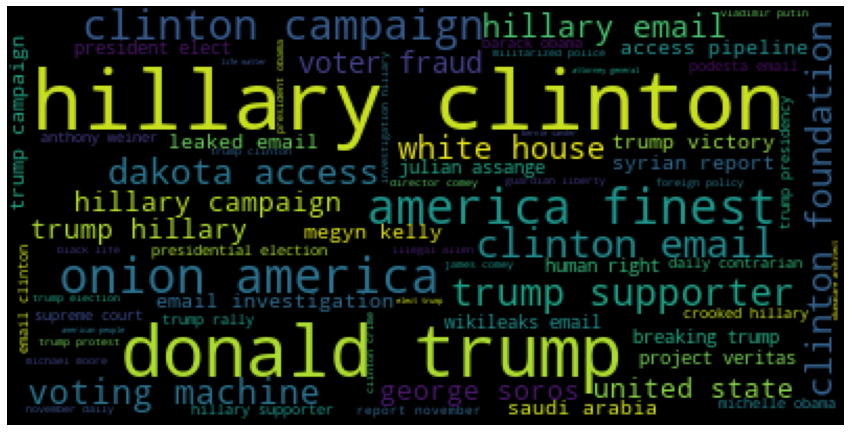

In [ ]:
# Plot word cloud of news title
plt.figure(figsize=(15,10))
wordcloud = WordCloud().generate_from_frequencies(freq_distribution)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Plot most common words by news category type

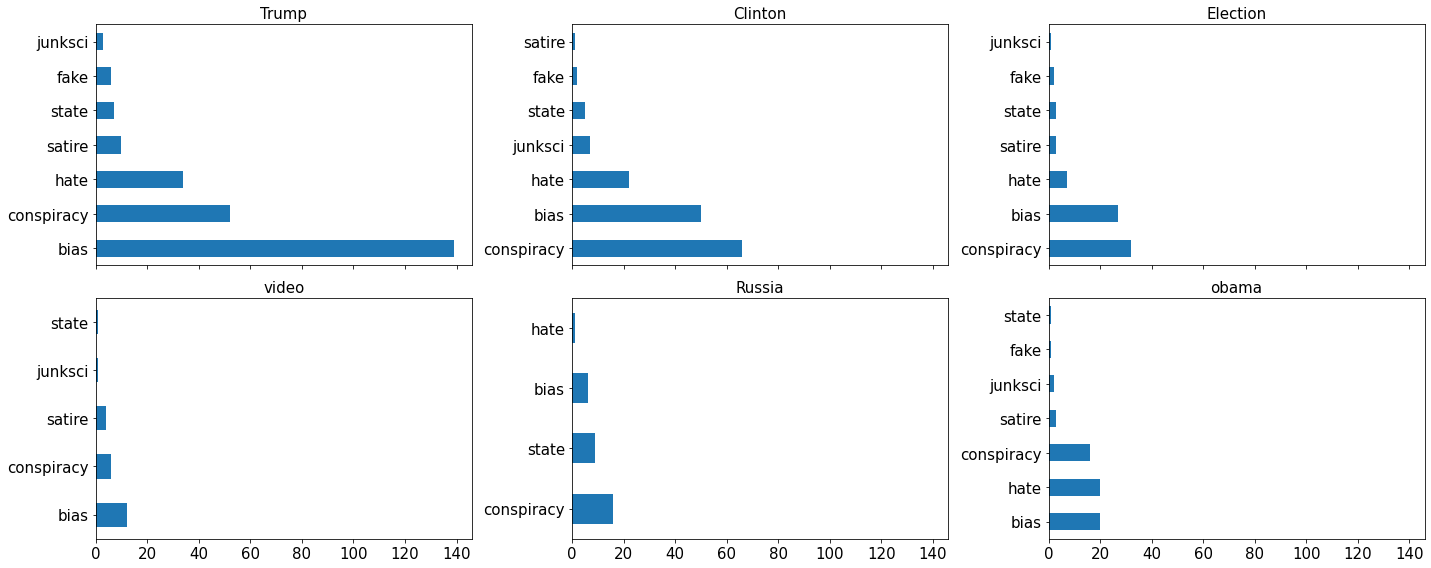

In [ ]:
# Plot most common words by news category type that are not bs
label = ['Trump|trump','Clinton|clinton', 'Election|election', 'video|Video', 'Russia|russia', 'obama|Obama']
fig, axes = plt.subplots(2,3, figsize=(20,8), sharex=True,)

for k, category in enumerate(label):
    ax = axes[k //3][k % 3]
    df[df['title'].str.contains(category) & (df['type'] != 'bs')]['type'].value_counts().plot(kind='barh', rot=0, ax=ax, fontsize=15)
    ax.set_title(category.split('|')[0], fontsize=15)

fig.tight_layout()
plt.show()

# Plot unique news sources

Text(0.5, 1.0, 'Publications')

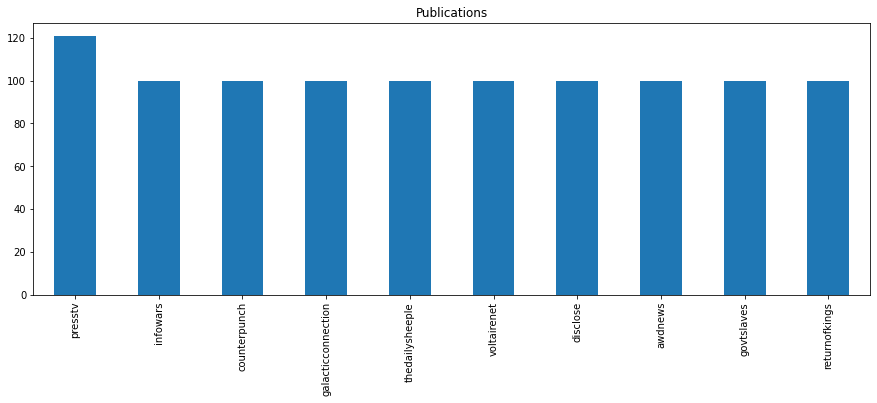

In [ ]:
# Plot sources of fake news
df['site_url'] = df['site_url'].apply(lambda x:x.split(".")[0])
plt.figure(figsize=(15,5))
df['site_url'].value_counts().head(10).plot(kind="bar")
plt.title('Publications')